In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def translate(img, x, y):
    # create translation matrix: here, two lists inside of a list
    transMat = np.float32([[1, 0, x], [0, 1, y]])
    dimensions = (img.shape[1], img.shape[0]) # tuple width/height
    # Note: warpAffine accepts image path, defined matrix, and dimensions
    # x values: shift right
    # -x values: shift left
    # y values : shift down
    # -y values: shift up
    return cv.warpAffine(img, transMat, dimensions)

In [3]:
def rotate(img, angle, rotPoint=None): # None=rotating around center
    (height, width) = img.shape[:2] # get image height/width

    if rotPoint is None: # assume rotating around center
        (width // 2, height // 2) # center
    
    # getRotationMatix2d() accepts center of rotation, angle, and scale
    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions = (width, height)

    # return rotated image
    return cv.warpAffine(img, rotMat, dimensions)


Metadata (Note: Number of Channels (3) represent RGB channels.):
Dimensions:  (690, 640, 3)
Height:  690
Width:  640
Channels:  3


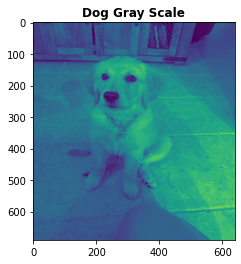

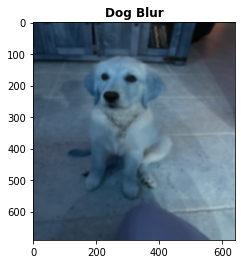

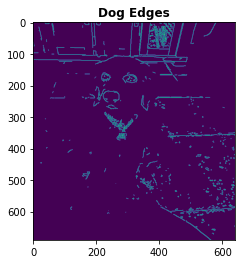

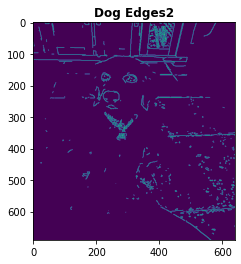

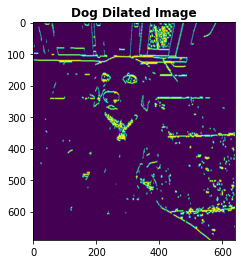

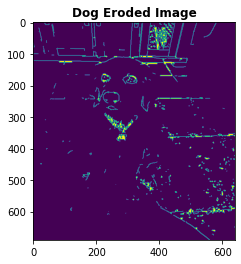

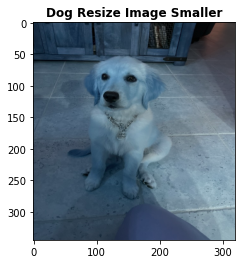

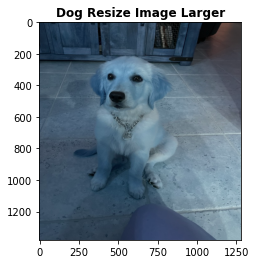

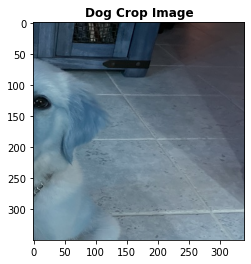

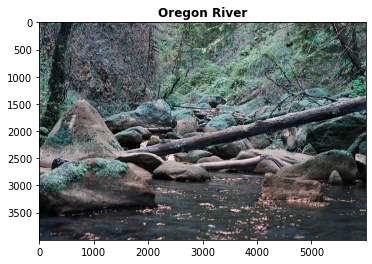

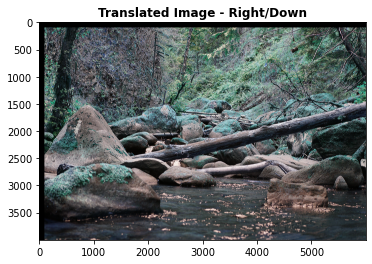

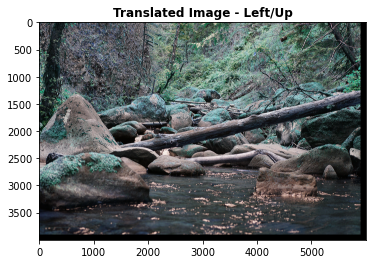

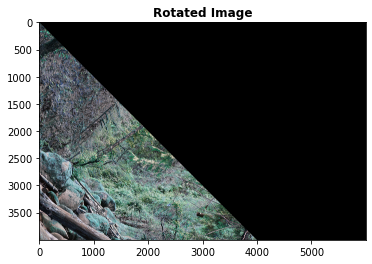

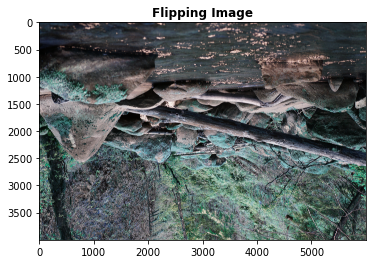

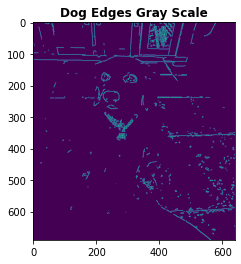


661 countour(s) found (grayscale, unblurred image)!

4 countour(s) found (blurred image)!

1045 countour(s) found (threshold image)!


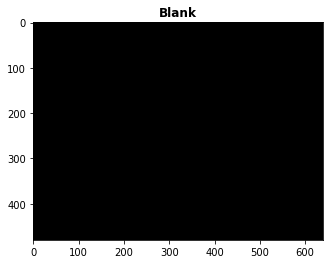

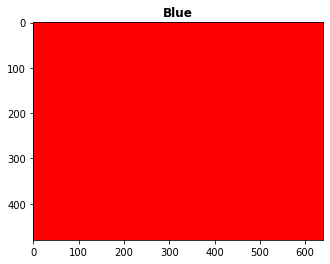

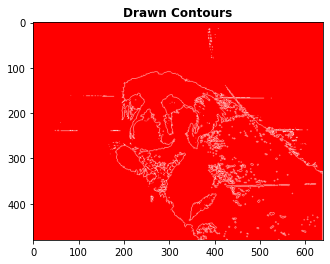

In [4]:
img_dog = cv.imread('photos/dog.jpg')
# read in images (return images as matrix of pixels)
# also, could draw an existing image
img_dog = cv.imread('photos/dog.jpg')

# image dimensions (in pixels)
dimensions = img_dog.shape

# image height, width, number of channels
height = img_dog.shape[0]
width = img_dog.shape[1]
channels = img_dog.shape[2]

print("\nMetadata (Note: Number of Channels (3) represent RGB channels.):")
print("Dimensions: ", dimensions)
print("Height: ", height)
print("Width: ", width)
print("Channels: ", channels)

# a. convert to BGR image to grayscale
img_gray_scale = cv.cvtColor(img_dog, cv.COLOR_BGR2GRAY)
plt.title('Dog Gray Scale', fontweight="bold")
plt.imshow(img_gray_scale)
plt.show()

# b. blur image (image, ksize, signmaX, dst, sigmaY, borderType)
img_blur = cv.GaussianBlur(img_dog, (9, 9), cv.BORDER_DEFAULT)
plt.title('Dog Blur', fontweight="bold")
plt.imshow(img_blur)
plt.show()

# c. edge detection (image, threshold1, threshold2, edges, apertureSize)
img_edge_detection = cv.Canny(img_dog, 125, 175)
plt.title('Dog Edges', fontweight="bold")
plt.imshow(img_edge_detection)
plt.show()

# d. edge detection (image, threshold1, threshold2, edges, apertureSize)
# reduce edges by blurring image (Note: fewer edges detected)
img_edge_detection2 = cv.Canny(img_dog, 125, 175)
plt.title('Dog Edges2', fontweight="bold")
plt.imshow(img_edge_detection2)
plt.show()

# e. image dilation (image, kernel, iterations)
img_dilated = cv.dilate(img_edge_detection2, (9, 9), iterations=3)
plt.title('Dog Dilated Image', fontweight="bold")
plt.imshow(img_dilated)
plt.show()

# f. image eroding (image, kernel, iterations)
# erode image (Note: values here attemps to "undilate" previous dilation)
img_eroded = cv.erode(img_dilated, (9, 9), iterations=3)
plt.title('Dog Eroded Image', fontweight="bold")
plt.imshow(img_eroded)
plt.show()

# resize and crop images
# g. resize images (image, destinationSize, interpolation)
img_resize_smaller = cv.resize(
img_dog, (320, 345), interpolation=cv.INTER_AREA)
plt.title('Dog Resize Image Smaller', fontweight="bold")
plt.imshow(img_resize_smaller)
plt.show()

img_resize_larger = cv.resize(
img_dog, (1280, 1380), interpolation=cv.INTER_CUBIC)
plt.title('Dog Resize Image Larger', fontweight="bold")
plt.imshow(img_resize_larger)
plt.show()

# h. crop images: using array slicing! (Note: images are arrays!)
img_crop = img_dog[50:400, 300:640]
plt.title('Dog Crop Image', fontweight="bold")
plt.imshow(img_crop)
plt.show()

# image transformations: translation, rotation, resizing, clipping, and cropping
# i. translation: shifting image along x and y axes
img_oregon = cv.imread('photos/oregon_river.jpg')
plt.title('Oregon River', fontweight="bold")
plt.imshow(img_oregon)
plt.show()

# shift image right 100px, and down 100px
img_translated_rt_dn = translate(img_oregon, 100, 100)
plt.title('Translated Image - Right/Down', fontweight="bold")
plt.imshow(img_translated_rt_dn)
plt.show()

# shift image left 100px and up 100px
img_translated_lt_up = translate(img_oregon, -100, -100)
plt.title('Translated Image - Left/Up', fontweight="bold")
plt.imshow(img_translated_lt_up)
plt.show()

# j. rotation: neg values clockwise, positive values counter-clockwise
# rotate image 45 degrees clockwise
img_rotated = rotate(img_oregon, -45)
plt.title('Rotated Image', fontweight="bold")
plt.imshow(img_rotated)
plt.show()

# k. flipping: accepts image and flip code (0, 1, -1)
# 0=flip vertically, 1=flip horizontally (mirror image), -1=flip vertically and horizontally
img_flip = cv.flip(img_oregon, 0)
plt.title('Flipping Image', fontweight="bold")
plt.imshow(img_flip)
plt.show()

# l. contour detection: object boundaries used for shape analysis, object detection/recognition
# use previous grayscale image and display edges
# 1) edge detection (image, threshold1, threshold2, edges, apertureSize)
img_edge_detection = cv.Canny(img_gray_scale, 125, 175)
plt.title('Dog Edges Gray Scale', fontweight="bold")
plt.imshow(img_edge_detection)
plt.show()

# 2) Find contours: findContours(image, mode, method, countours, hierarchy)
# Note: looks at image edges and returns contours (list), and hierarchial representation of shape
contours, hierarchies = cv.findContours(
img_edge_detection, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
# print number of contours
print(f'\n{len(contours)} countour(s) found (grayscale, unblurred image)!')

img_edge_detection_blurred = cv.Canny(img_blur, 125, 175)
cv.imshow('Dog Edges Blurred', img_edge_detection_blurred)

# use previous blurred image (*significantly* reduces number of contours!)
contours, hierarchies = cv.findContours(
img_edge_detection_blurred, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

# print number of contours
print(f'\n{len(contours)} countour(s) found (blurred image)!')

# m. contour detection: object boundaries used for shape analysis, object detection/recognition
# 3) edge detection: threshold (image, threshold, maxval, type)
# threshold(): binarizes image into black/white
# Here: if pixel intensity below 125 set to 0 (black), if above 125, set to 255 (white)
ret, img_thresh = cv.threshold(img_gray_scale, 125, 255, cv.THRESH_BINARY)

contours, hierarchies = cv.findContours(
img_thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

cv.imshow('Dog Edges Gray Scale - Using Threshold', img_thresh)

# print number of contours
print(f'\n{len(contours)} countour(s) found (threshold image)!')

height = 480 # np rows
width = 640 # np cols
num_colors = 3 # np channels (B, G, R channels/colors)

# np.zeros: Returns new array of given shape and type, filled with zeros.
# 1. display blank image
img_blank = np.zeros((height, width, num_colors), dtype='uint8')
plt.title('Blank', fontweight="bold")
plt.imshow(img_blank)
plt.show()

# 2. color image (BGR values)
img_blank[:] = 255, 0, 0
plt.title('Blue', fontweight="bold")
plt.imshow(img_blank)
plt.show()

# n. draw contours on blank image
# drawContours(image, contours, contourIdx (-1=all contours), color, thickness)
# Note: drawContours(): different return than threshold function
cv.drawContours(img_blank, contours, -1, (255, 255, 255), 1)
plt.title('Drawn Contours', fontweight="bold")
plt.imshow(img_blank)
plt.show()